<a href="https://colab.research.google.com/github/nicobargioni/knowledge_graph_api_entities/blob/main/Nicolas_Bargioni_TP2_AA1_aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1 Aprendizaje no supervisado

**Nicolás Bargioni**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de clustering y reducción de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

##EDA

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mice_protein_expression = fetch_ucirepo(id=342)

# data (as pandas dataframes)
X = mice_protein_expression.data.features
y = mice_protein_expression.data.targets

# metadata
print(mice_protein_expression.metadata)

# variable information
print(mice_protein_expression.variables)

{'uci_id': 342, 'name': 'Mice Protein Expression', 'repository_url': 'https://archive.ics.uci.edu/dataset/342/mice+protein+expression', 'data_url': 'https://archive.ics.uci.edu/static/public/342/data.csv', 'abstract': 'Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.', 'area': 'Biology', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 1080, 'num_features': 80, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': ['MouseID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Tue Apr 16 2024', 'dataset_doi': '10.24432/C50S3Z', 'creators': ['Clara Higuera', 'Katheleen Gardiner', 'Krzysztof Cios'], 'intro_paper': {'ID': 475, 'type': 'NATIVE', 'title': 'Self-Organizing Feature Maps Identify Proteins Critical

In [154]:
df_completo_original = pd.concat([X, y], axis=1)
df_completo_original.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [26]:
# prompt: codigo para ver las variables categoricas de X

# Identify categorical variables in X
categorical_cols = X.select_dtypes(include='object').columns
print("Categorical variables in X:")
categorical_cols

Categorical variables in X:


Index(['Genotype', 'Treatment', 'Behavior'], dtype='object')

In [5]:
X.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1077 non-null   float64
 1   ITSN1_N          1077 non-null   float64
 2   BDNF_N           1077 non-null   float64
 3   NR1_N            1077 non-null   float64
 4   NR2A_N           1077 non-null   float64
 5   pAKT_N           1077 non-null   float64
 6   pBRAF_N          1077 non-null   float64
 7   pCAMKII_N        1077 non-null   float64
 8   pCREB_N          1077 non-null   float64
 9   pELK_N           1077 non-null   float64
 10  pERK_N           1077 non-null   float64
 11  pJNK_N           1077 non-null   float64
 12  PKCA_N           1077 non-null   float64
 13  pMEK_N           1077 non-null   float64
 14  pNR1_N           1077 non-null   float64
 15  pNR2A_N          1077 non-null   float64
 16  pNR2B_N          1077 non-null   float64
 17  pPKCAB_N      

In [11]:
X.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S


In [10]:
X.shape

(1080, 80)

In [15]:
y.value_counts()

,count
class,
c-CS-m,150
c-SC-m,150
c-CS-s,135
c-SC-s,135
t-CS-m,135
t-SC-m,135
t-SC-s,135
t-CS-s,105


In [17]:
X.isnull().sum().sort_values(ascending=False)

,0
BCL2_N,285
H3MeK4_N,270
BAD_N,213
EGR1_N,210
H3AcK18_N,180
...,...
SYP_N,0
CaNA_N,0
Genotype,0
Treatment,0


In [18]:
X.duplicated().sum()

np.int64(0)

In [50]:
y

,class
0,c-CS-m
1,c-CS-m
2,c-CS-m
3,c-CS-m
4,c-CS-m
...,...
1075,t-SC-s
1076,t-SC-s
1077,t-SC-s
1078,t-SC-s


A la visualización la hago sobre el dataset preprocesado

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

## Resolución:

##Limpieza: missing values

Primero voy a graficar las variables numéricas sobre el dataset crudo para ver si hay outliers y con eso voy a decidir si imputo los nulos con la media o la mediana.

Si hay muchos outliers, con la mediana (por ser más robusta en estos casos), sino, con la media

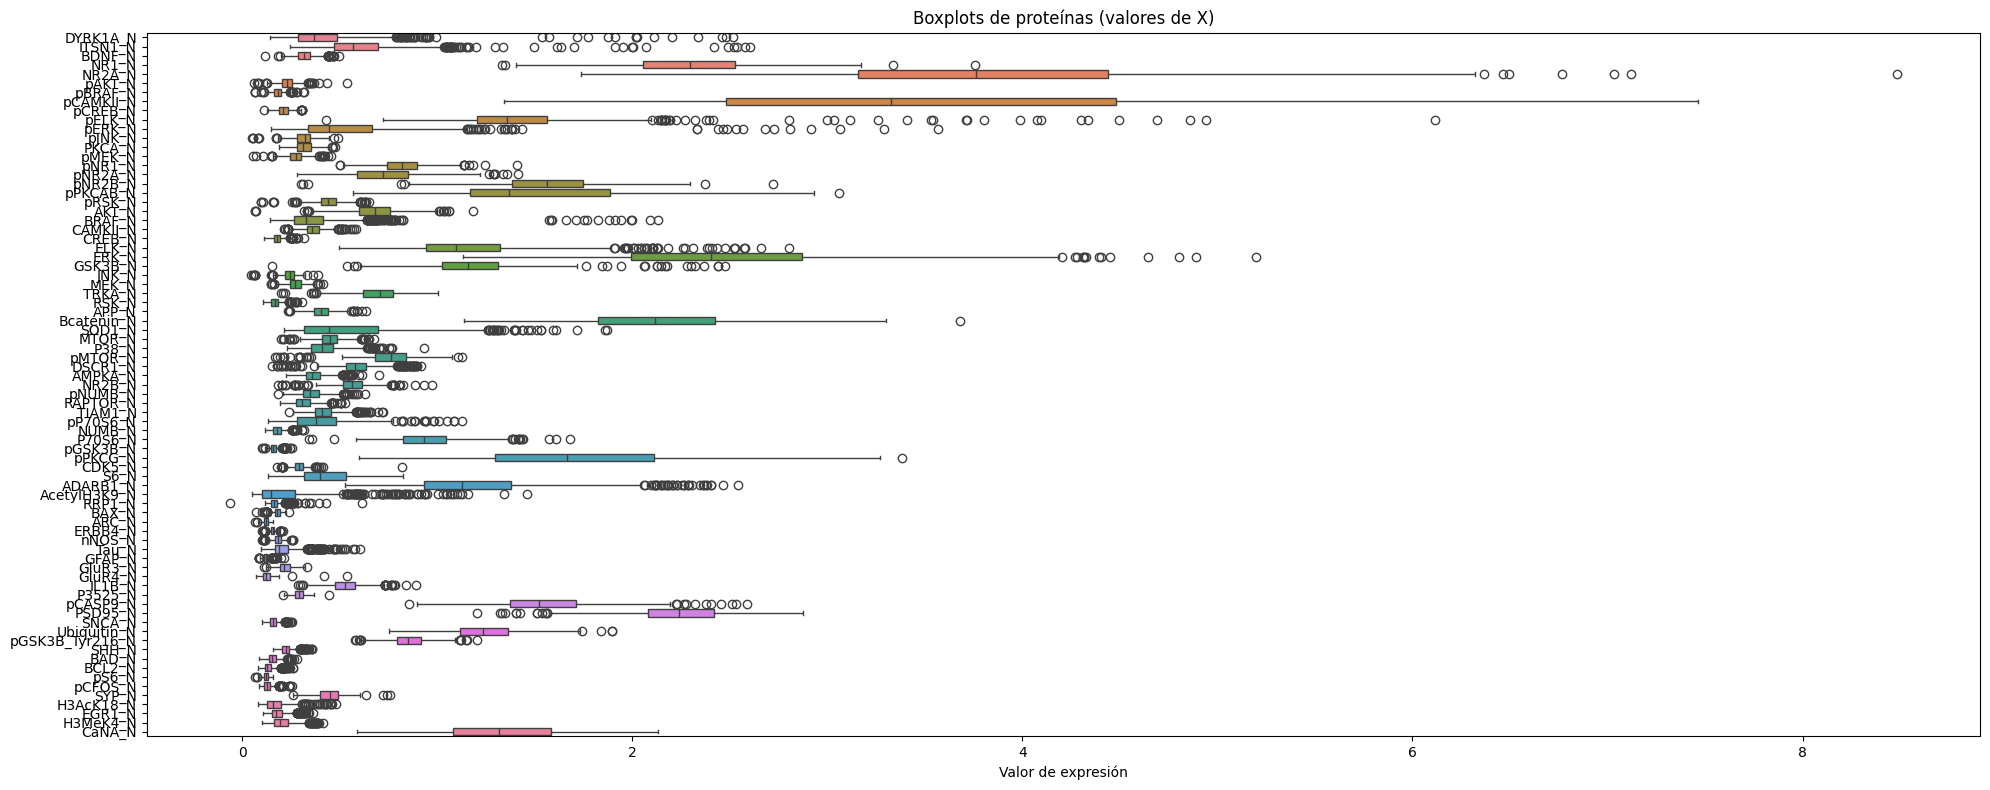

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas
X_num = X.select_dtypes(include='number')

# Plot general de boxplots por columna
plt.figure(figsize=(20, 8))  # Ajustá tamaño si hay muchas columnas
sns.boxplot(data=X_num, orient='h')
plt.title('Boxplots de proteínas (valores de X)')
plt.xlabel('Valor de expresión')
plt.tight_layout()
plt.show()

In [25]:
# Imputar NaNs con la mediana
X_imputed = X_num.fillna(X_num.median())
X_imputed.isnull().sum().sort_values(ascending=False)

,0
DYRK1A_N,0
ITSN1_N,0
BDNF_N,0
NR1_N,0
NR2A_N,0
...,...
SYP_N,0
H3AcK18_N,0
EGR1_N,0
H3MeK4_N,0


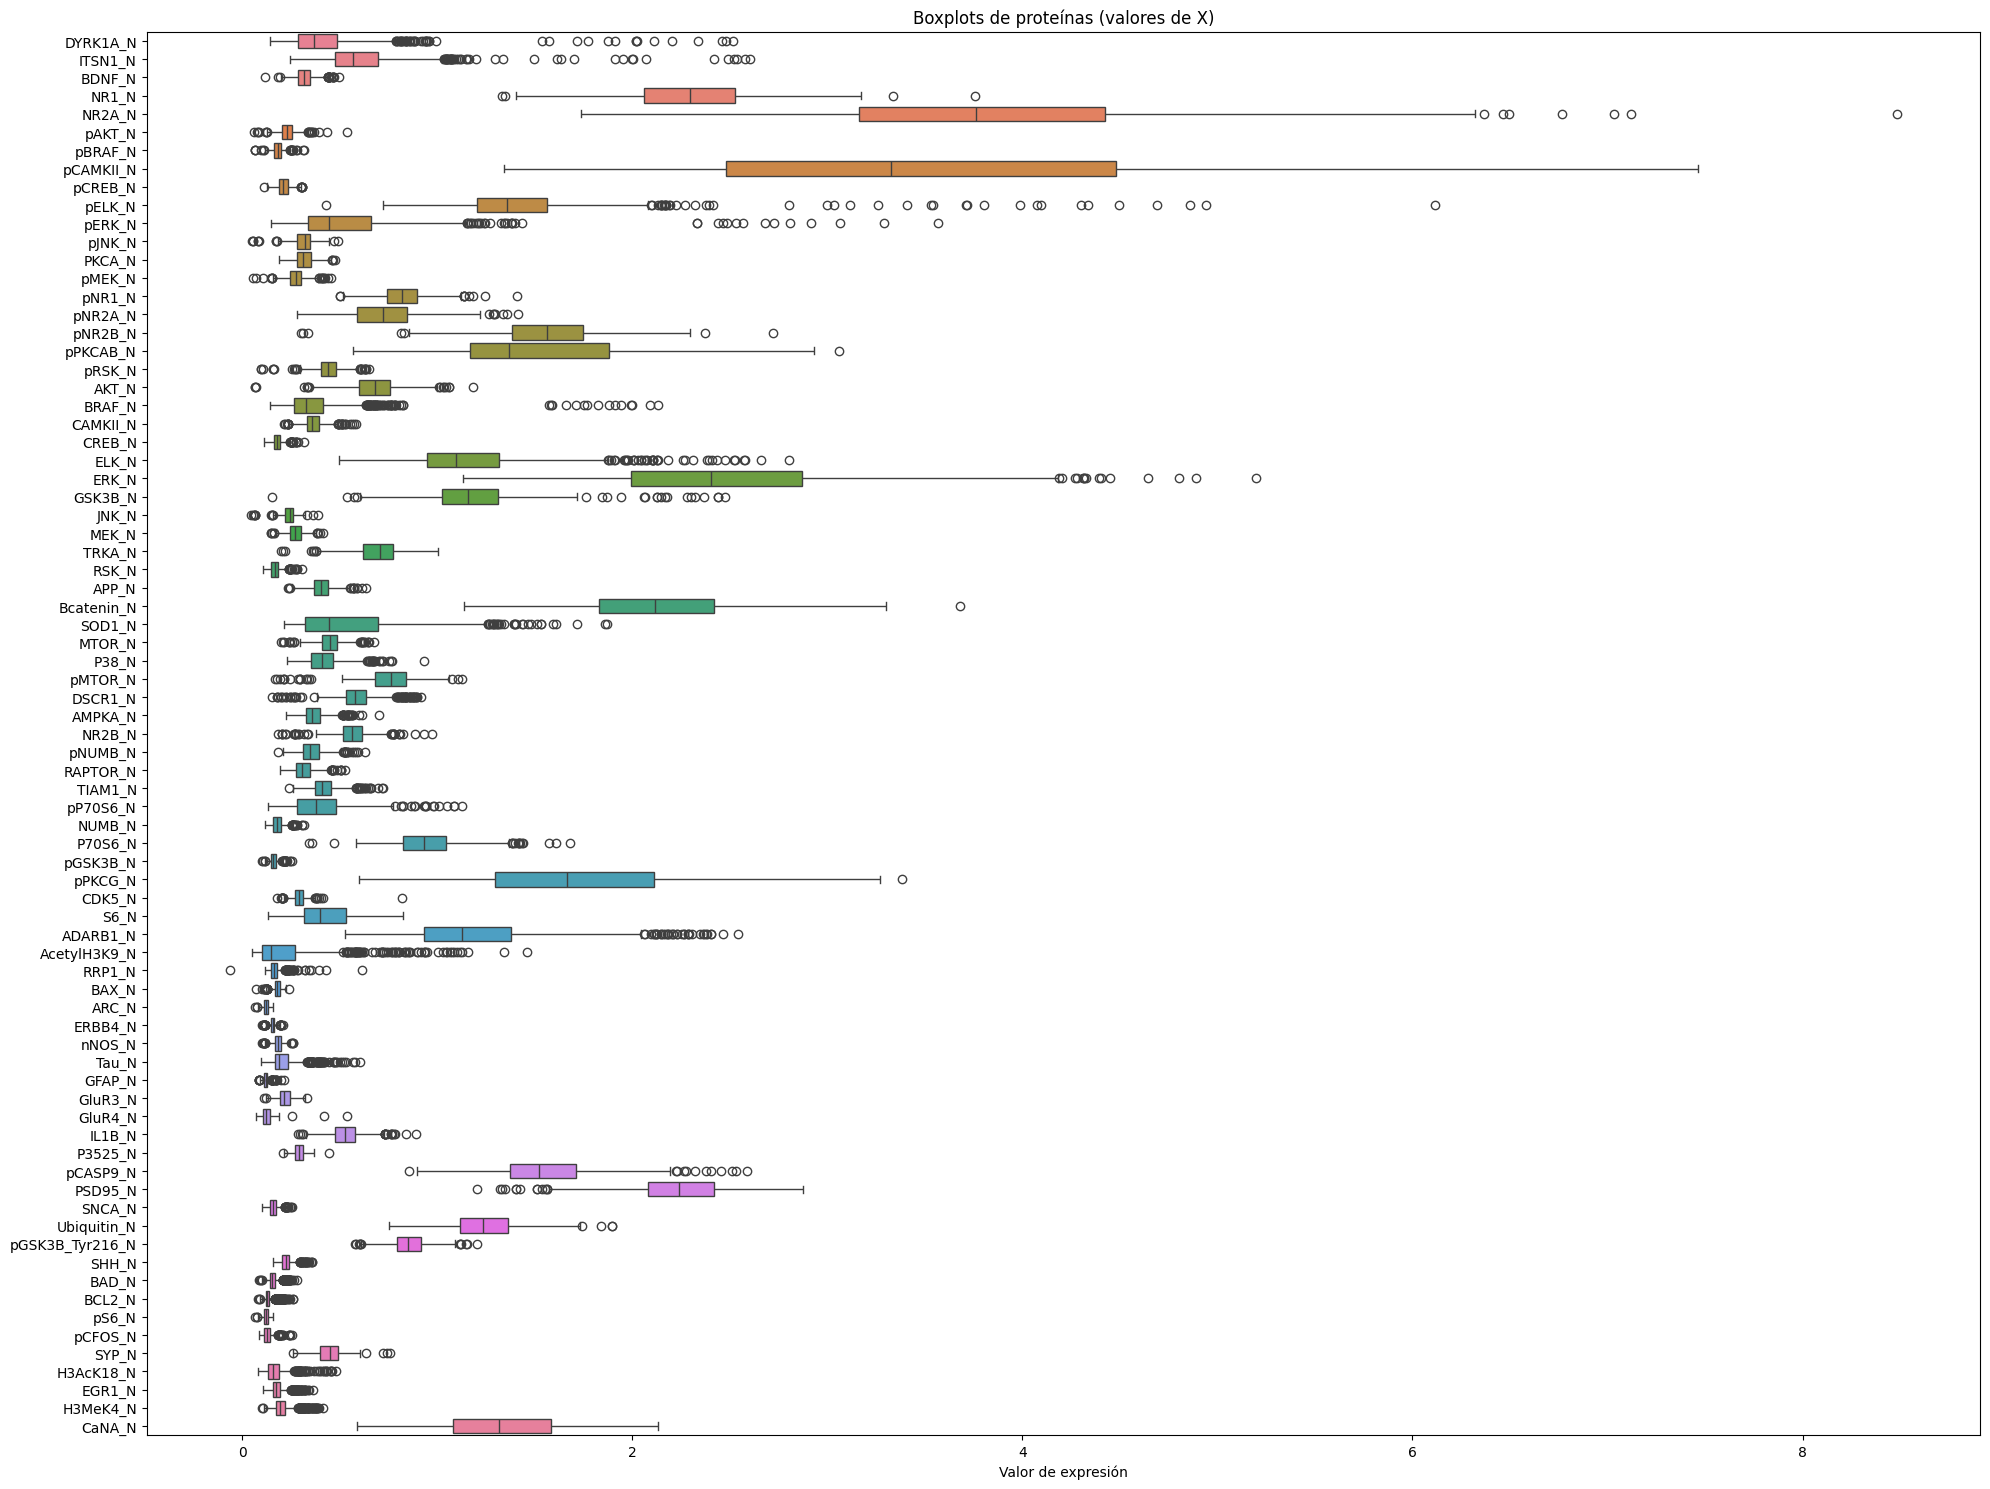

In [33]:
# Plot boxplots por columna de X_imputed
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_imputed, orient='h')
plt.title('Boxplots de proteínas (valores de X)')
plt.xlabel('Valor de expresión')
plt.tight_layout()
plt.show()

Acá volví a graficar los boxplots con el dataset con imputación por la mediana y efectivamente, no se afectaron los outliers, por lo que la decisión fue correcta.

##Limpieza: outliers

En este caso, los outliers pueden ser ruido, o bien contener información biológica real. Puede tratarse de mediciones extremas de expresión de proteínas (muy altas o muy bajas) por variablidad biológica real (un ratón con respuesta exagerada), o bien ruido técnico (mediciones, contaminación, etc).

Por este motivo, voy a decidir **caparlos**. No quiero eliminarlos porque tal vez se pierda información valiosa, y tampoco dejarlos tal como están, porque pueden ser ruido técnico, y kmeans es sensible a outliers.

Lo que voy a hacer es usar la función clip de pandas, para tomar el percentil 1 y el percentil 99 de cada columna. Cualquier valor menor al 1% y cualquier valor mayor al 99%, se reemplaza por el valor del percentil.

In [27]:
# Capar outliers al percentil 1% y 99% por columna
X_capped = X_imputed.clip(
    lower=X_imputed.quantile(0.01),
    upper=X_imputed.quantile(0.99),
    axis=1  # Aplica por columna
)

In [28]:
lower_bounds = X_imputed.quantile(0.01)
upper_bounds = X_imputed.quantile(0.99)

outliers_capped = ((X_imputed < lower_bounds) | (X_imputed > upper_bounds)).sum()
print(outliers_capped.sort_values(ascending=False))

DYRK1A_N     22
ITSN1_N      22
BDNF_N       22
NR1_N        22
NR2A_N       22
             ..
SYP_N        22
H3AcK18_N    22
EGR1_N       22
H3MeK4_N     22
CaNA_N       22
Length: 77, dtype: int64


Este output me muestra que todas las columnas tienen exactamente 22 outliers cada una (valores que quedaron fuera del rango 1%-99%).

Eso representa aproximadamente el 2% del total de filas (1080 × 0.02 = ~22).

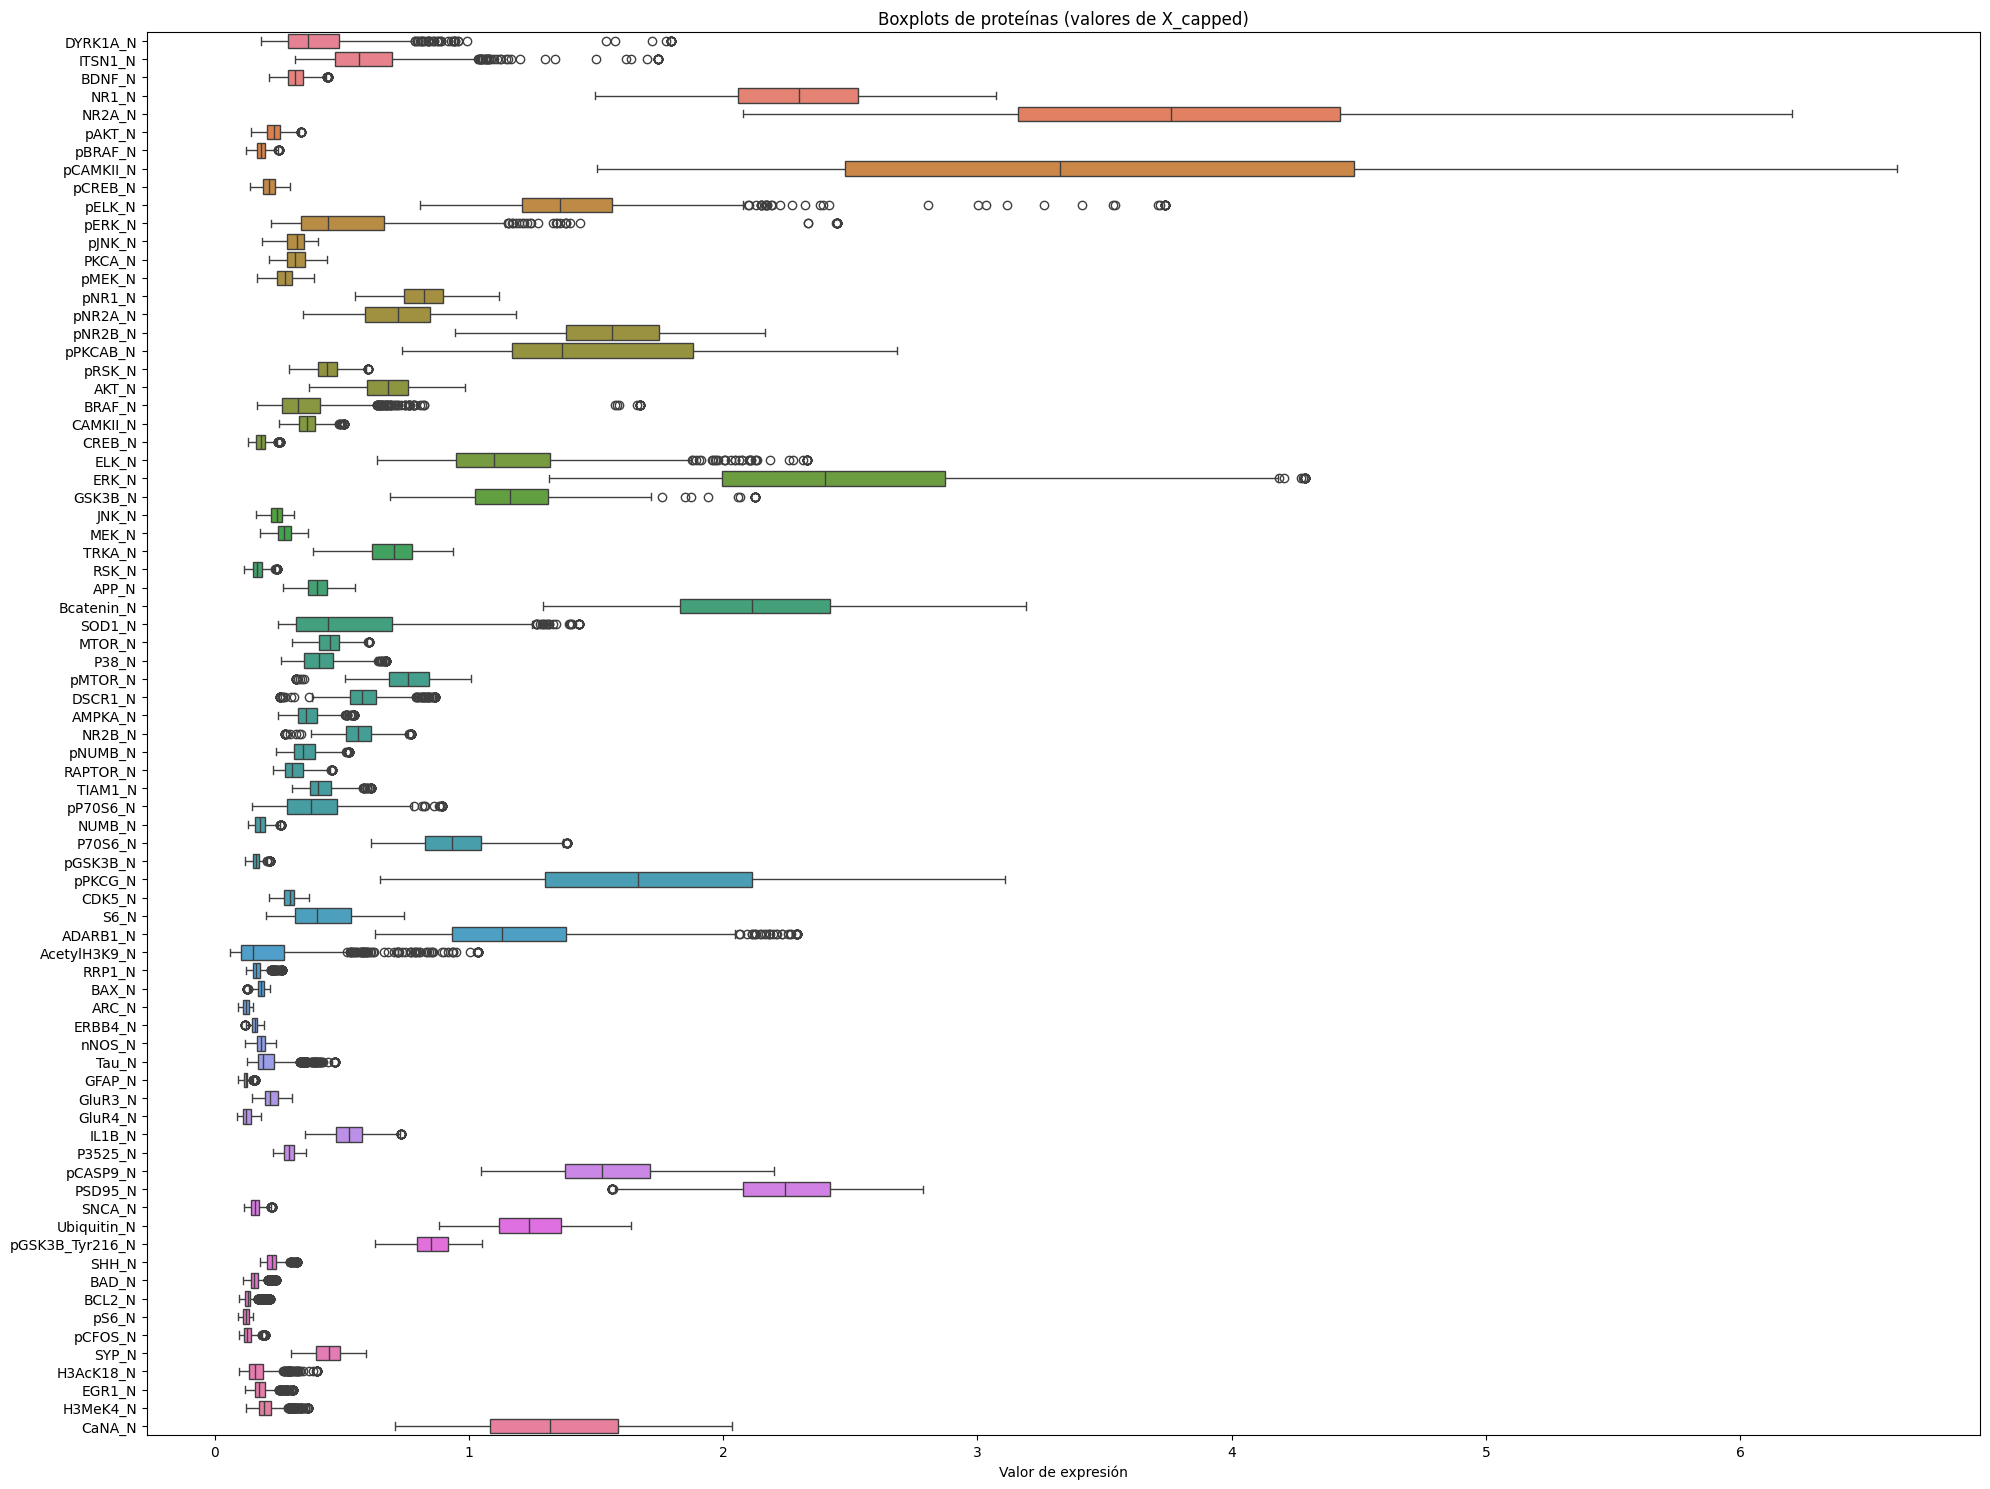

In [34]:
# Boxplots de X_capped
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_capped, orient='h')
plt.title('Boxplots de proteínas (valores de X_capped)')
plt.xlabel('Valor de expresión')
plt.tight_layout()
plt.show()

##Limpieza: features descartadas + variables categóricas

Las variables categóricas son genotype, treatment y behavior. En este caso no las voy a usar porque al trabajar Kmeans con distancia euclidiana, solo tiene sentido hacerlo con variables numéricas reales. Incluso si hiciera one-hot encoding, al no representar distancias reales, se introduciría ruido en la clusterización.

O sea, Kmeans asumiría que treatment = 1 sería el doble que treatment 0, cuando en realidad son dos **condiciones** distintas, no otra cosa.

Concretamente: no le voy a decir al algoritmo si un ratón es trisómico o no, la idea sería analizar los clusters y ver si hay algún patrón relacionado a ello.

En este sentido, me voy a quedar solo con el dataset X y voy a descartar y. El algoritmo no debe ver las clases reales (por ser aprendizaje no supervisado).

De todas formas, las voy a usar para evaluar los clusters más tarde.y

##Escalado de variables

In [36]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Paso 1: Instanciar el scaler
scaler = StandardScaler()

# Paso 2: Ajustar y transformar los datos capados
X_scaled = scaler.fit_transform(X_capped)

# Paso 3: convierto a DataFrame para mantener los nombres de columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X_capped.columns)

In [37]:
X_scaled_df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.368550,0.625424,2.299533,1.522216,2.360385,-0.365518,-0.167760,-0.904183,0.610622,0.801271,...,-1.335793,-1.315727,-0.164233,-1.088656,-1.010346,-0.290140,-1.003811,-1.397976,-1.562300,1.072745
1,0.418009,0.356904,1.918449,1.443664,2.025407,-0.550415,-0.353067,-0.967753,0.447474,0.425707,...,-0.926594,-1.545998,-0.164233,-1.068181,-1.193651,-0.064906,-1.057436,-1.304708,-1.500629,1.288530
2,0.393516,0.547143,2.053831,1.143942,1.956263,-0.617889,-0.239693,-0.974619,0.549206,0.340512,...,-1.164600,-1.475563,-0.164233,-0.946101,-1.106849,-0.155180,-1.059166,-1.353725,-1.578164,1.869027
3,0.091185,0.024371,0.818077,0.498718,1.250814,-0.261276,-0.210800,-1.076708,-0.172853,0.422570,...,-1.220308,-0.925024,-0.164233,-1.311384,-0.876936,-0.840828,-0.705655,-0.957271,-1.168789,1.151845
4,0.058884,0.026005,0.821719,0.202367,0.964459,-0.512638,-0.321459,-1.090956,-0.634070,0.201797,...,-0.742375,-1.034071,-0.164233,-1.197218,-0.902835,-0.180423,-0.933228,-1.157996,-1.137696,1.593741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.752785,-0.684625,-1.330446,-0.599433,-1.361559,-0.547859,-0.413753,-0.818486,-0.163133,-0.882574,...,1.735192,1.300652,-0.164233,-0.410755,2.408609,-1.114606,2.889623,0.653512,2.645851,0.085772
1076,-0.674640,-0.635791,-1.397176,-0.396398,-1.140383,0.468348,0.024664,-0.795895,0.117148,-0.826251,...,2.006500,1.299887,-0.164233,-0.567117,2.059813,-1.096385,3.020506,0.533985,1.912213,0.084677
1077,-0.870699,-1.000642,-1.759925,-1.650810,-1.777857,-0.318351,-0.797245,-1.203371,-0.851331,-1.304477,...,2.277005,2.311200,-0.164233,-0.186518,1.267481,-0.367556,2.937794,1.344174,3.211159,0.295347
1078,-0.904310,-0.918811,-1.555851,-1.231419,-1.598643,-0.620824,-0.321600,-1.128341,-0.637612,-1.211527,...,2.838714,2.526463,-0.164233,0.266349,3.000029,-0.747751,3.217027,1.967005,3.424364,0.210269


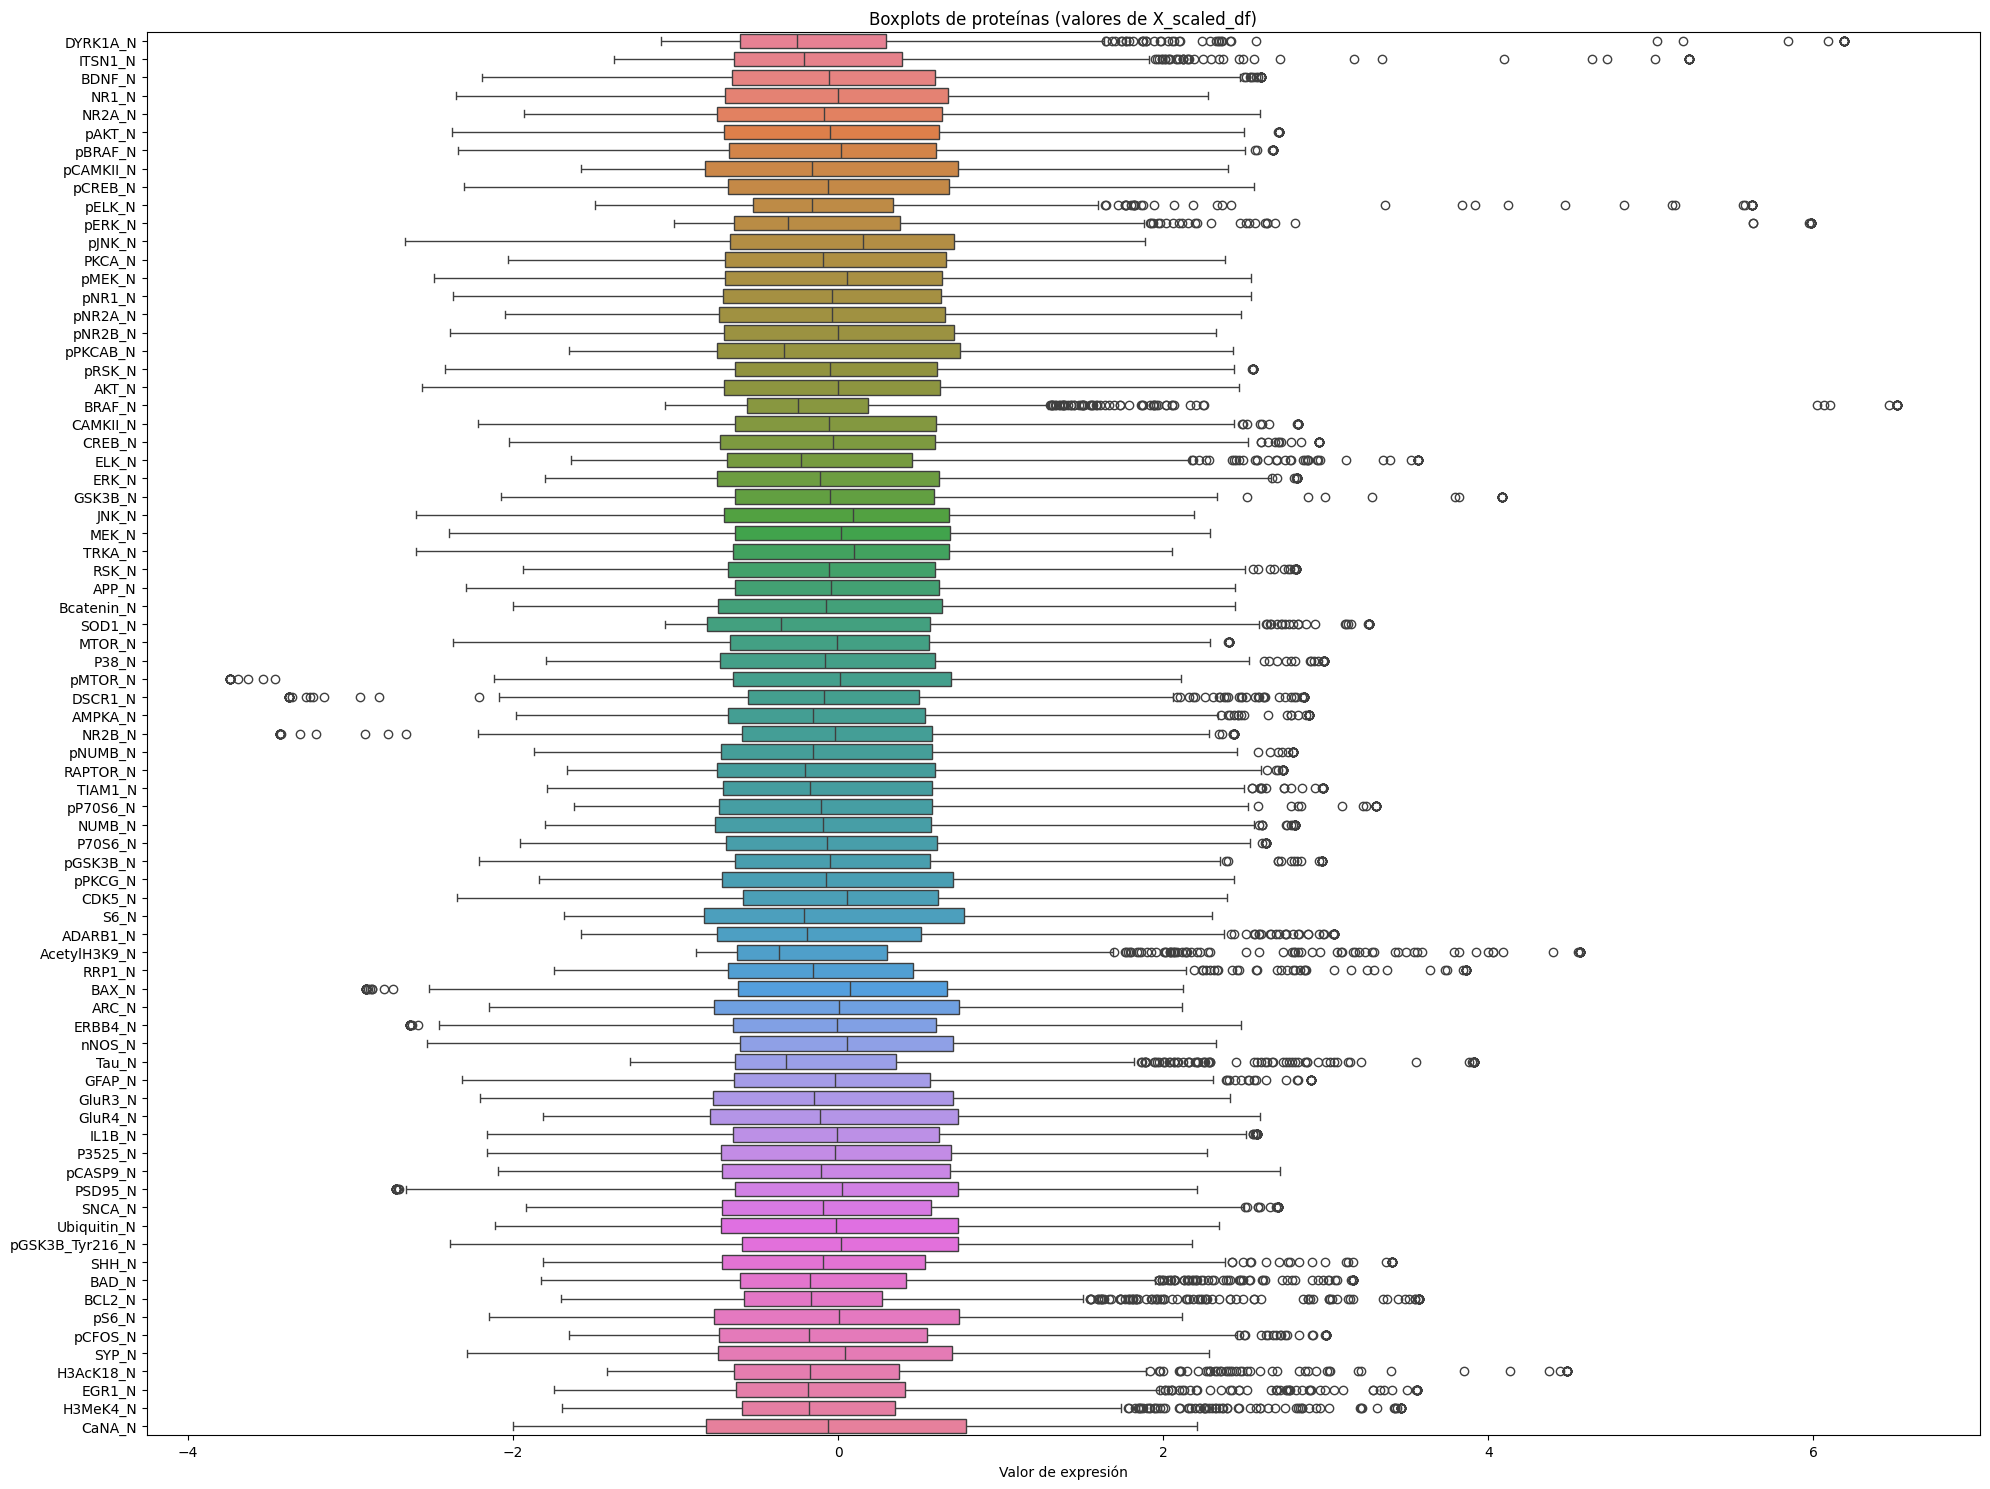

In [40]:
# Boxplots de X_scaled_df
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_scaled_df, orient='h')
plt.title('Boxplots de proteínas (valores de X_scaled_df)')
plt.xlabel('Valor de expresión')
plt.tight_layout()
plt.show()

##Para ver cómo se distribuyen los valores las variables, voy a usar pairplots, pero sobre las 6 proteínas con mayor varianza y sobre X_scaled. Podría hacerlo sobre X_capped pero quiero hacerlo para ver cómo se organizan los datos desde la perspectiva de Kmeans

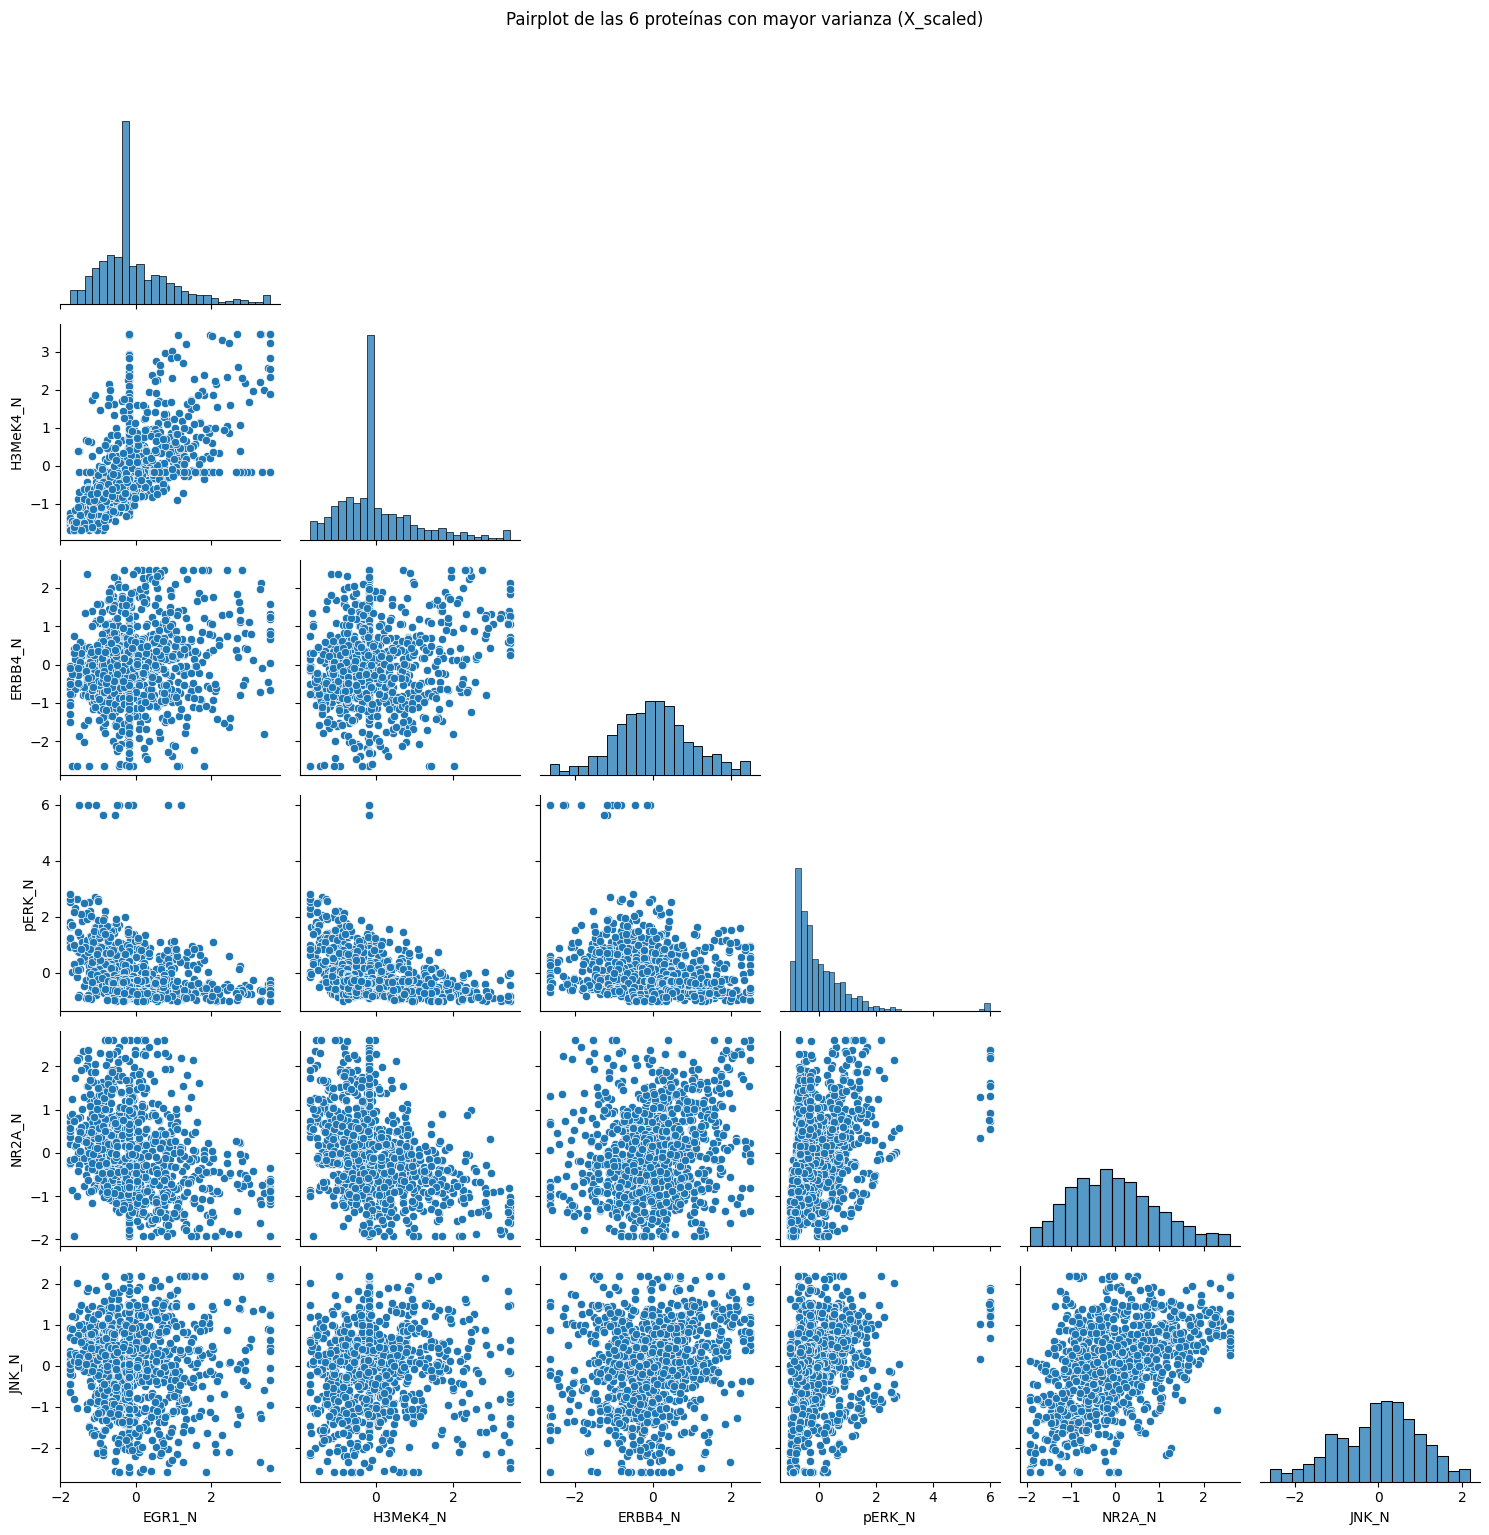

In [77]:
# Seleccionamos las 6 proteínas con mayor varianza
top_6_var = X_scaled_df.var().sort_values(ascending=False).head(6).index
X_top6 = X_scaled_df[top_6_var]

# Graficamos pairplot
sns.pairplot(X_top6, corner=True)
plt.suptitle('Pairplot de las 6 proteínas con mayor varianza (X_scaled)', y=1.02)
plt.tight_layout()
plt.show()

/tmp/ipython-input-78-4205218736.py:8: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


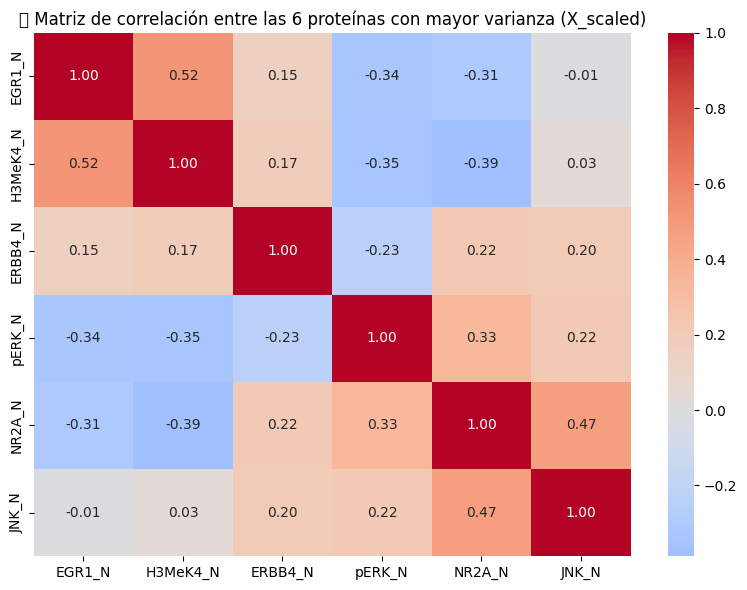

In [78]:
# Calcular la matriz de correlación entre las 6 proteínas seleccionadas
cor_matrix = X_top6.corr()

# Graficar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("🔗 Matriz de correlación entre las 6 proteínas con mayor varianza (X_scaled)")
plt.tight_layout()
plt.show()

La matriz de correlacion entre las proteínas con más varianza, muestra que hay relaciones biológicas tales que provocan prácticamente una activación mutua. Por ejemplo: EGR1 y H3MeK4 tienden a activarse juntas- Asimismo, hay otras como pERK_N que tiene relaciones inversas en su mayoría a las demás.

Al final, esto puede ayudar a interpretar diferencias entre clústers como si fueran perfiles proteicos.




## 4. **Clustering**  
   

En este apartado aplicará clustering sobre los datos obtenidos del paso 3)

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

K=2, Silhouette Score=0.1462
K=3, Silhouette Score=0.1312
K=4, Silhouette Score=0.1237
K=5, Silhouette Score=0.1211
K=6, Silhouette Score=0.1269
K=7, Silhouette Score=0.1299
K=8, Silhouette Score=0.1303
K=9, Silhouette Score=0.1383
K=10, Silhouette Score=0.1343
K=11, Silhouette Score=0.1392
K=12, Silhouette Score=0.1343
K=13, Silhouette Score=0.1443
K=14, Silhouette Score=0.1418


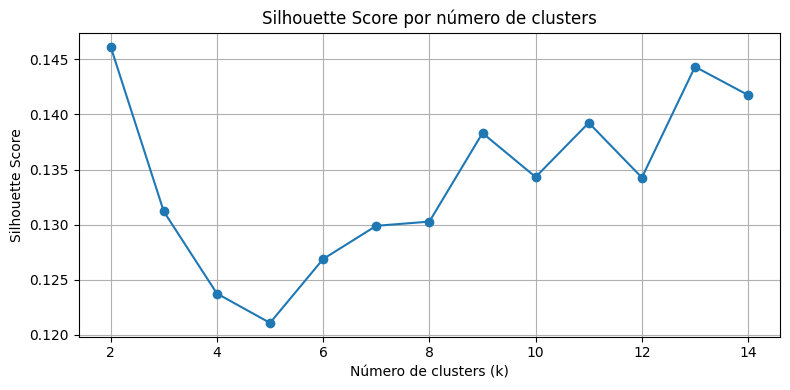

In [44]:
#@title Silhouette Score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Probar diferentes valores de K
range_n_clusters = range(2, 15)  # Cambiá el rango si querés explorar más

silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled_df)
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}, Silhouette Score={silhouette_avg:.4f}")

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score por número de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

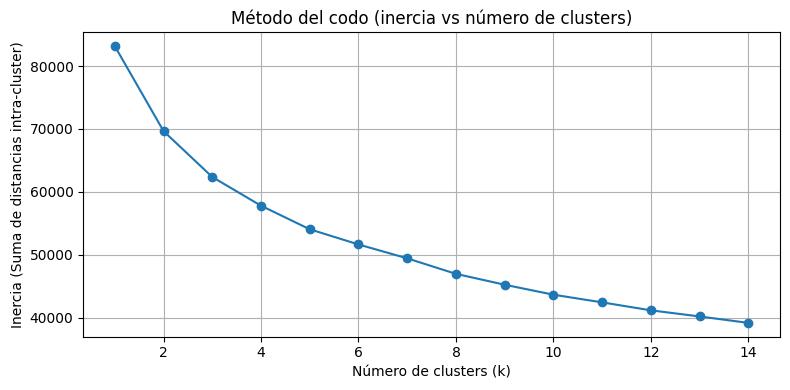

In [46]:
#@title Método del codo

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
range_k = range(1, 15)  # o el rango que quieras probar

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    inertias.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(range_k, inertias, marker='o')
plt.title('Método del codo (inercia vs número de clusters)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Suma de distancias intra-cluster)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
#@title Kmeans con 2 clusters

from sklearn.cluster import KMeans

# KMeans con k = 2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_2 = kmeans_2.fit_predict(X_scaled_df)

In [80]:
clusters_2

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [58]:
#@title KMeans con 6 clusters

kmeans_6 = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters_6 = kmeans_6.fit_predict(X_scaled_df)

In [69]:
clusters_6

array([2, 2, 2, ..., 0, 0, 5], dtype=int32)

##Acá voy a armar un dataframe combinado para juntar las features numéricas escaladas, las variables categóricas y la columna class. Va a servir para visualizar todos los datos juntos, agregar los clusters como una nueva columna, y comparar los grupos detectados con las clases originales

In [59]:
# Unir los datos numéricos escalados + categóricas + clase
df_final = pd.concat([
    X_scaled_df,                            # features normalizadas
    X[['Genotype', 'Treatment', 'Behavior']],  # categóricas originales
    y                                # la clase combinada
], axis=1)

In [60]:
df_final.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.368550,0.625424,2.299533,1.522216,2.360385,-0.365518,-0.167760,-0.904183,0.610622,0.801271,...,-1.010346,-0.290140,-1.003811,-1.397976,-1.562300,1.072745,Control,Memantine,C/S,c-CS-m
1,0.418009,0.356904,1.918449,1.443664,2.025407,-0.550415,-0.353067,-0.967753,0.447474,0.425707,...,-1.193651,-0.064906,-1.057436,-1.304708,-1.500629,1.288530,Control,Memantine,C/S,c-CS-m
2,0.393516,0.547143,2.053831,1.143942,1.956263,-0.617889,-0.239693,-0.974619,0.549206,0.340512,...,-1.106849,-0.155180,-1.059166,-1.353725,-1.578164,1.869027,Control,Memantine,C/S,c-CS-m
3,0.091185,0.024371,0.818077,0.498718,1.250814,-0.261276,-0.210800,-1.076708,-0.172853,0.422570,...,-0.876936,-0.840828,-0.705655,-0.957271,-1.168789,1.151845,Control,Memantine,C/S,c-CS-m
4,0.058884,0.026005,0.821719,0.202367,0.964459,-0.512638,-0.321459,-1.090956,-0.634070,0.201797,...,-0.902835,-0.180423,-0.933228,-1.157996,-1.137696,1.593741,Control,Memantine,C/S,c-CS-m


In [61]:
# Agregar al DataFrame final
df_kmeans_2 = df_final.copy()
df_kmeans_2['Cluster_2'] = clusters_2

# Agregar al DataFrame final
df_kmeans_6 = df_final.copy()
df_kmeans_6['Cluster_6'] = clusters_6

In [64]:
df_kmeans_2.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Cluster_2
0,0.368550,0.625424,2.299533,1.522216,2.360385,-0.365518,-0.167760,-0.904183,0.610622,0.801271,...,-0.290140,-1.003811,-1.397976,-1.562300,1.072745,Control,Memantine,C/S,c-CS-m,0
1,0.418009,0.356904,1.918449,1.443664,2.025407,-0.550415,-0.353067,-0.967753,0.447474,0.425707,...,-0.064906,-1.057436,-1.304708,-1.500629,1.288530,Control,Memantine,C/S,c-CS-m,0
2,0.393516,0.547143,2.053831,1.143942,1.956263,-0.617889,-0.239693,-0.974619,0.549206,0.340512,...,-0.155180,-1.059166,-1.353725,-1.578164,1.869027,Control,Memantine,C/S,c-CS-m,0
3,0.091185,0.024371,0.818077,0.498718,1.250814,-0.261276,-0.210800,-1.076708,-0.172853,0.422570,...,-0.840828,-0.705655,-0.957271,-1.168789,1.151845,Control,Memantine,C/S,c-CS-m,0
4,0.058884,0.026005,0.821719,0.202367,0.964459,-0.512638,-0.321459,-1.090956,-0.634070,0.201797,...,-0.180423,-0.933228,-1.157996,-1.137696,1.593741,Control,Memantine,C/S,c-CS-m,1


In [65]:
df_kmeans_6.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Cluster_6
0,0.368550,0.625424,2.299533,1.522216,2.360385,-0.365518,-0.167760,-0.904183,0.610622,0.801271,...,-0.290140,-1.003811,-1.397976,-1.562300,1.072745,Control,Memantine,C/S,c-CS-m,2
1,0.418009,0.356904,1.918449,1.443664,2.025407,-0.550415,-0.353067,-0.967753,0.447474,0.425707,...,-0.064906,-1.057436,-1.304708,-1.500629,1.288530,Control,Memantine,C/S,c-CS-m,2
2,0.393516,0.547143,2.053831,1.143942,1.956263,-0.617889,-0.239693,-0.974619,0.549206,0.340512,...,-0.155180,-1.059166,-1.353725,-1.578164,1.869027,Control,Memantine,C/S,c-CS-m,2
3,0.091185,0.024371,0.818077,0.498718,1.250814,-0.261276,-0.210800,-1.076708,-0.172853,0.422570,...,-0.840828,-0.705655,-0.957271,-1.168789,1.151845,Control,Memantine,C/S,c-CS-m,3
4,0.058884,0.026005,0.821719,0.202367,0.964459,-0.512638,-0.321459,-1.090956,-0.634070,0.201797,...,-0.180423,-0.933228,-1.157996,-1.137696,1.593741,Control,Memantine,C/S,c-CS-m,3


### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

In [71]:
#@title Comparación con la clase original
print("🔍 Comparación Cluster_2 vs Clase:")
print(pd.crosstab(df_kmeans_2['Cluster_2'], df_kmeans_2['class']), '\n')

print("🔍 Comparación Cluster_6 vs Clase:")
print(pd.crosstab(df_kmeans_6['Cluster_6'], df_kmeans_6['class']), '\n')

🔍 Comparación Cluster_2 vs Clase:
class      c-CS-m  c-CS-s  c-SC-m  c-SC-s  t-CS-m  t-CS-s  t-SC-m  t-SC-s
Cluster_2                                                                
0              98      73      81      95      47      41     113      77
1              52      62      69      40      88      64      22      58 

🔍 Comparación Cluster_6 vs Clase:
class      c-CS-m  c-CS-s  c-SC-m  c-SC-s  t-CS-m  t-CS-s  t-SC-m  t-SC-s
Cluster_6                                                                
0              17      21      27      29      40      21       4      29
1              14       0      62      76       0       0      69      15
2              46      34       0       0      15      15       2      19
3              39      46       0       0      74      55       0      29
4              17      33       1       1       6       8      17      32
5              17       1      60      29       0       6      43      11 



In [72]:
##@title Comparar con Genotype
print("🔍 Cluster_2 vs Genotype:")
print(pd.crosstab(df_kmeans_2['Cluster_2'], df_kmeans_2['Genotype']), '\n')

print("🔍 Cluster_6 vs Genotype:")
print(pd.crosstab(df_kmeans_6['Cluster_6'], df_kmeans_6['Genotype']), '\n')

🔍 Cluster_2 vs Genotype:
Genotype   Control  Ts65Dn
Cluster_2                 
0              347     278
1              223     232 

🔍 Cluster_6 vs Genotype:
Genotype   Control  Ts65Dn
Cluster_6                 
0               94      94
1              152      84
2               80      51
3               85     158
4               52      63
5              107      60 



In [73]:
##@title Comparar con Treatment
print("🔍 Cluster_2 vs Treatment:")
print(pd.crosstab(df_kmeans_2['Cluster_2'], df_kmeans_2['Treatment']), '\n')

print("🔍 Cluster_6 vs Treatment:")
print(pd.crosstab(df_kmeans_6['Cluster_6'], df_kmeans_6['Treatment']), '\n')

🔍 Cluster_2 vs Treatment:
Treatment  Memantine  Saline
Cluster_2                   
0                339     286
1                231     224 

🔍 Cluster_6 vs Treatment:
Treatment  Memantine  Saline
Cluster_6                   
0                 88     100
1                145      91
2                 63      68
3                113     130
4                 41      74
5                120      47 



In [74]:
##@title Comparar con Behavior
print("🔍 Cluster_2 vs Behavior:")
print(pd.crosstab(df_kmeans_2['Cluster_2'], df_kmeans_2['Behavior']), '\n')

print("🔍 Cluster_6 vs Behavior:")
print(pd.crosstab(df_kmeans_6['Cluster_6'], df_kmeans_6['Behavior']), '\n')

🔍 Cluster_2 vs Behavior:
Behavior   C/S  S/C
Cluster_2          
0          259  366
1          266  189 

🔍 Cluster_6 vs Behavior:
Behavior   C/S  S/C
Cluster_6          
0           99   89
1           14  222
2          110   21
3          214   29
4           64   51
5           24  143 



##Para cada proteína, ¿qué valores de expresión tienen los ratones que cayeron en cada cluster?



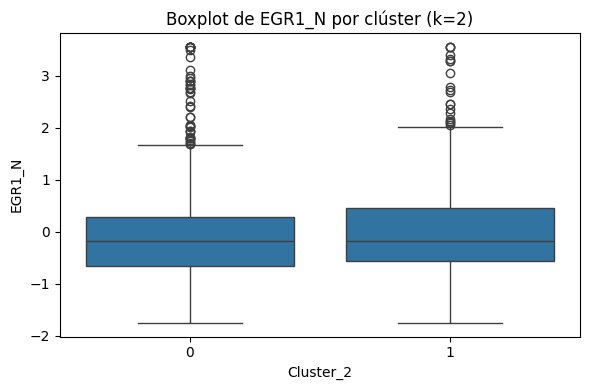

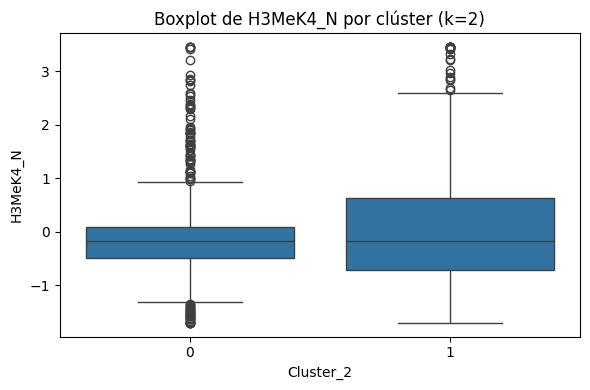

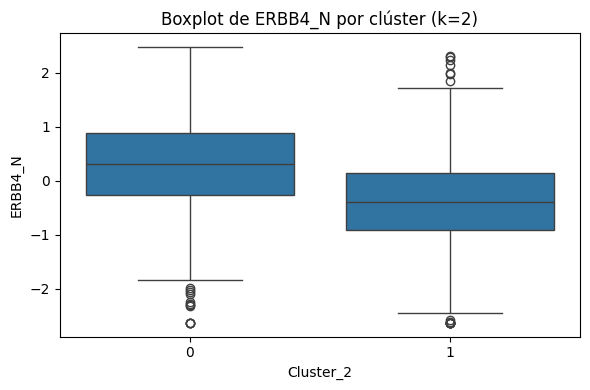

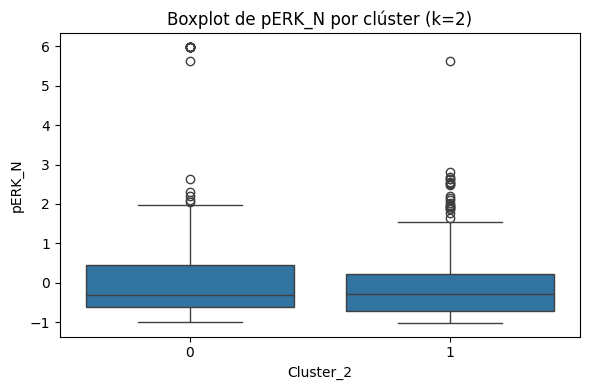

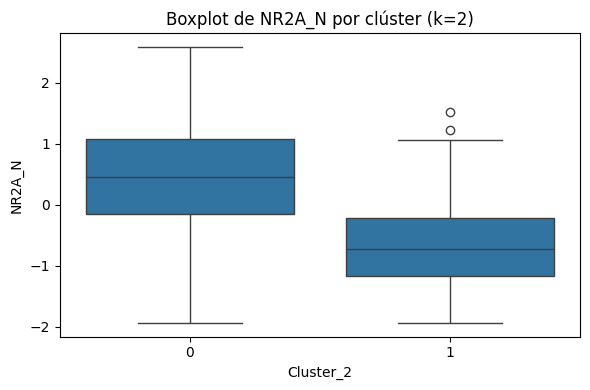

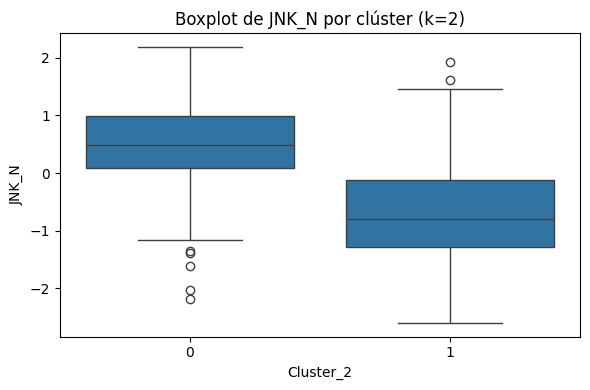

In [86]:
# 1. Elegir las 6 proteínas con mayor varianza
top_6 = df_kmeans_2.drop(columns=['Cluster_2', 'Genotype', 'Treatment', 'Behavior', 'class']) \
                   .var().sort_values(ascending=False).head(6).index.tolist()

# 2. Graficar boxplots por cluster
for var in top_6:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster_2', y=var, data=df_kmeans_2)
    plt.title(f'Boxplot de {var} por clúster (k=2)')
    plt.tight_layout()
    plt.show()

Al analizar la distribución intra-clúster de las proteínas con mayor varianza para k=2, observamos que algunas variables muestran diferencias claras entre grupos.

Por ejemplo, NR2A_N y JNK_N presentan patrones claramente distintos entre los clústers, lo que sugiere que podrían estar influyendo fuertemente en la separación generada por KMeans.

En cambio, proteínas como EGR1_N y pERK_N tienen distribuciones muy similares, por lo que es poco probable que estén aportando significativamente al proceso de clustering.

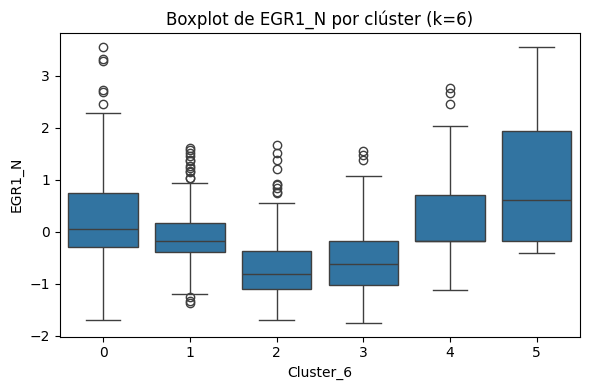

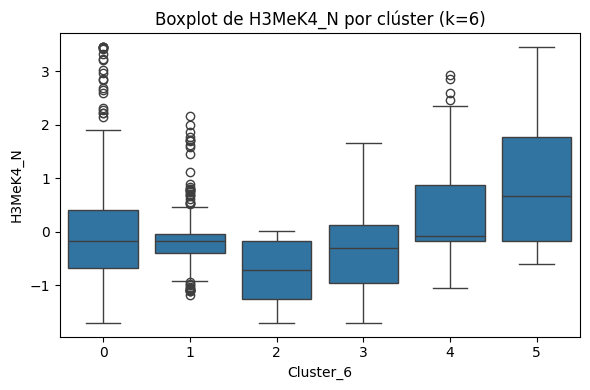

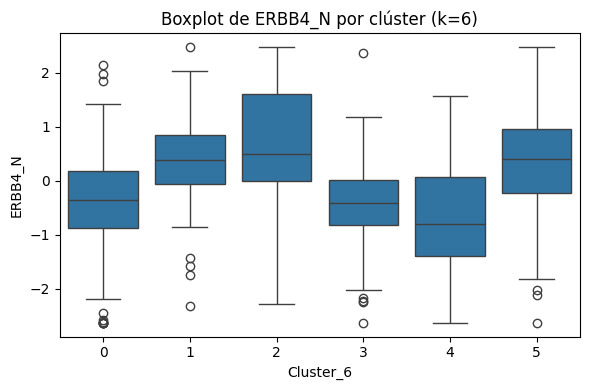

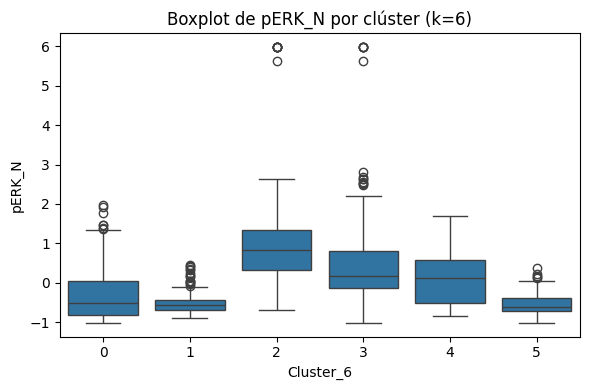

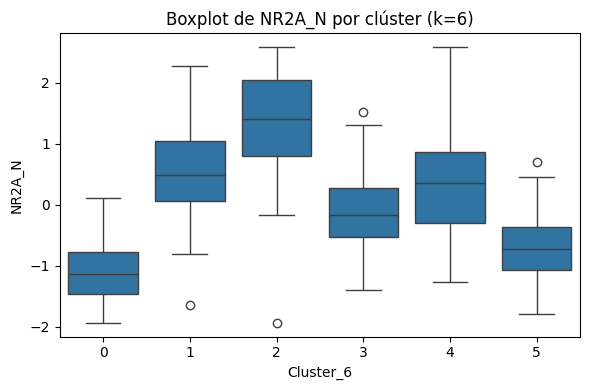

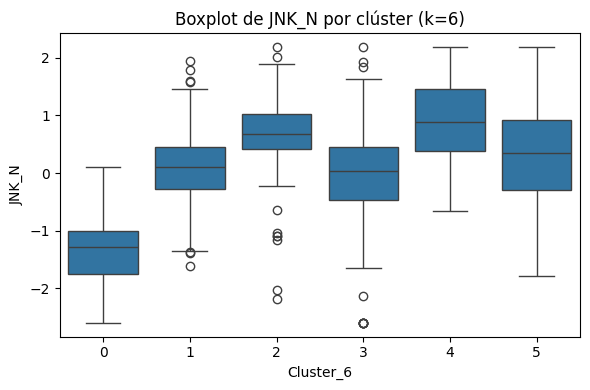

In [89]:
# 1. Elegir las 6 proteínas con mayor varianza
top_6 = df_kmeans_6.drop(columns=['Cluster_6', 'Genotype', 'Treatment', 'Behavior', 'class']) \
                   .var().sort_values(ascending=False).head(6).index.tolist()

# 2. Graficar boxplots por cluster
for var in top_6:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster_6', y=var, data=df_kmeans_6)
    plt.title(f'Boxplot de {var} por clúster (k=6)')
    plt.tight_layout()
    plt.show()

Al incrementar la cantidad de clústers a k=6, observamos una separación mucho más marcada entre los grupos en varias proteínas clave como NR2A_N, JNK_N y pERK_N.
Esto sugiere que el modelo de clustering está captando diferencias biológicamente relevantes que se diluían en el análisis con solo 2 clústers.

Proteínas como H3MeK4_N y ERBB4_N muestran perfiles diferenciados entre múltiples clústers, lo que refuerza su posible rol discriminativo en los patrones de expresión del dataset.

## 5- Reducción de dimensionalidad

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

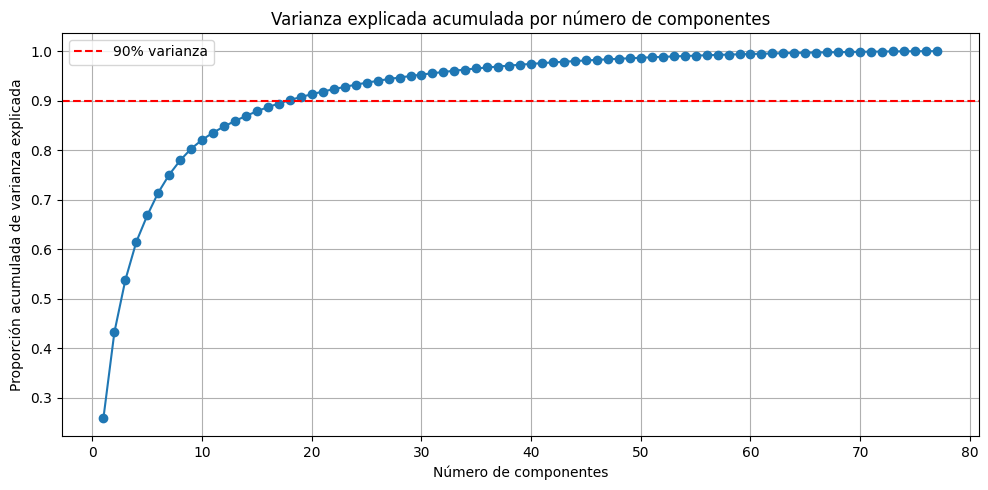

In [95]:
#@title Primero grafico la varianza explicada acumulada

from sklearn.decomposition import PCA
import numpy as np

# Aplicar PCA
pca_full = PCA()
pca_full.fit(X_scaled)

# Varianza explicada acumulada
varianza_acumulada = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% varianza')
plt.title('Varianza explicada acumulada por número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Proporción acumulada de varianza explicada')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Para elegir el número de componentes me basé en la varianza explicada por los componentes principales. En el gráfico veo cuánta información (varianza) conserva cada componente y cuántos necesito para mantener, en este caso, el 90% de la varianza original: 18 componentes

##Comparación PCA: Clústeres vs Clases reales

Acá lo que voy a hacer es comparar cómo se agrupan los datos según Kmeans y las clases reales. Así voy a ver si los clústers formados automaticamente se alinean o no con las clases reales del experimento.

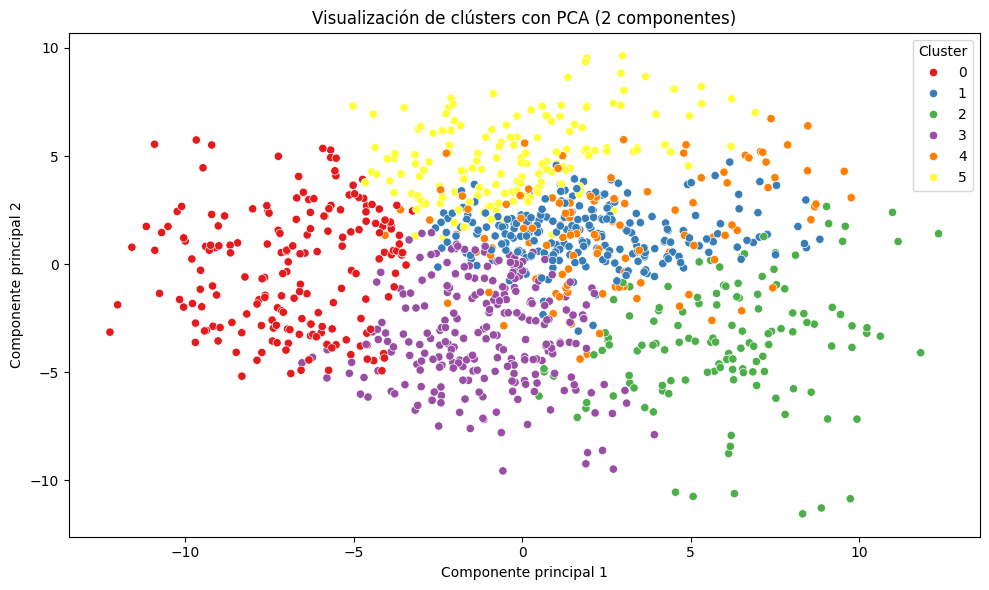

In [101]:
#@title PCA con 6 clusters

#n_components=2 para graficar

# Paso 1: Aplicar PCA sobre los datos ya escalados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Asegurate que X_scaled esté bien

# Paso 2: Crear un DataFrame con los componentes y los clústers
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster_6'] = clusters_6

# Paso 3: Visualizar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster_6', palette='Set1')
plt.title('Visualización de clústers con PCA (2 componentes)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Este gráfico, haciend hue en los clusters, muestra agrupaciones descubiertas automaticamente, sin haber visto las etiquetas reales

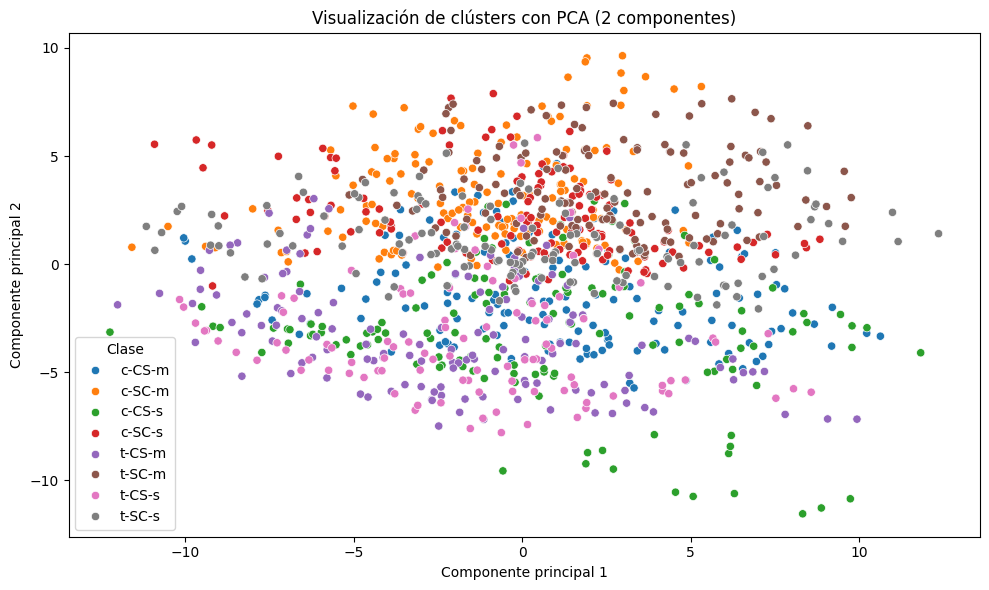

In [108]:
plt.figure(figsize=(10, 6))

df_pca['class'] = df_kmeans_6['class']
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='class', palette='tab10')
plt.title('Visualización de clústers con PCA (2 componentes)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Clase')
plt.tight_layout()
plt.show()

Este grafico muestra la clase real experimental

##Conclusión sobre la clusterización de kmeans

Los clústeres de K-means (k=6) capturan patrones similares a los grupos definidos por las clases reales, pero no hay una correspondencia perfecta. Algunas clases están mejor agrupadas que otras.

Esto sugiere que:

K-means logra separar parcialmente las clases biológicas, especialmente las más distintas entre sí.

Puede ser útil como herramienta exploratoria para detectar patrones relevantes en los datos de expresión proteica.

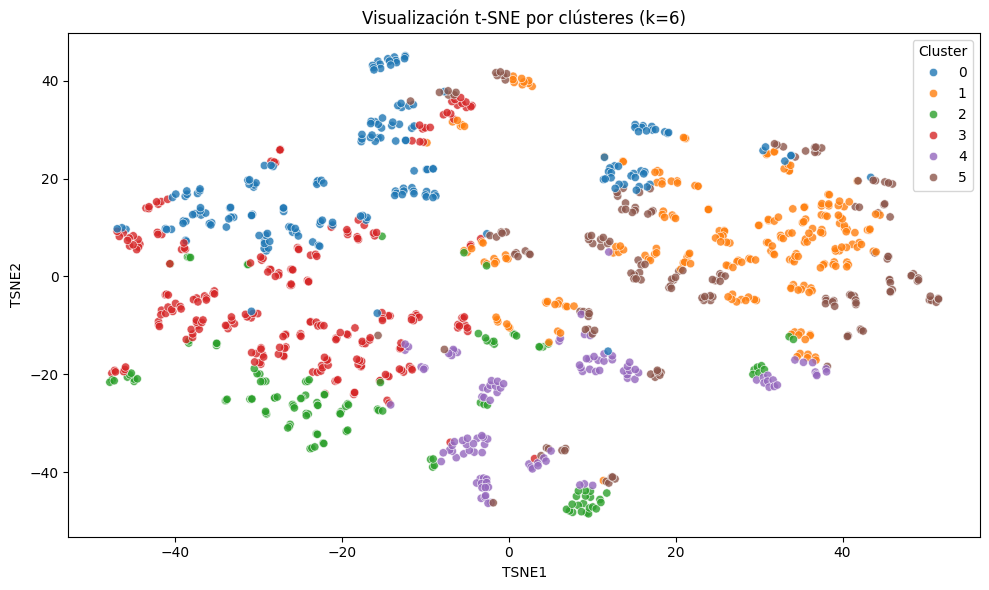

In [112]:
from sklearn.manifold import TSNE

# Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Crear DataFrame para graficar
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster_6'] = df_kmeans_6['Cluster_6']

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster_6', palette='tab10', alpha=0.8)
plt.title('Visualización t-SNE por clústeres (k=6)')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


**Conclusiones t-SNE:**

Separación clara: Algunos grupos están bien separados, lo cual sugiere que K-means logró encontrar patrones reales en los datos

Poca superposición: Hay baja mezcla entre clústeres, lo que afirma la elección de k=6 por sobre k=2

### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y análisis que realizó para el punto 4) pero con este dataset reducido.

In [117]:
pca = PCA(n_components=18)
X_pca = pca.fit_transform(X_scaled)

In [118]:
X_pca.shape

(1080, 18)

In [119]:
X_pca

array([[ 4.86213975, -5.37112493, -1.91770874, ...,  0.19635825,
         1.30472175,  0.28261189],
       [ 3.19078575, -5.49789998, -0.99248502, ...,  0.27866787,
         1.14160196,  0.13051576],
       [ 3.31682216, -5.72040383, -0.76336789, ...,  0.41023505,
         1.25098256,  0.10317225],
       ...,
       [-7.58214581,  2.70991989,  2.03693134, ..., -0.02336447,
        -0.30204749,  0.29012282],
       [-6.49781311,  3.32636066,  2.13312892, ...,  0.08768863,
         0.51672201, -0.46283357],
       [-3.05060491,  4.05927737,  0.32877197, ..., -0.36331958,
         0.82502923,  0.13947312]])

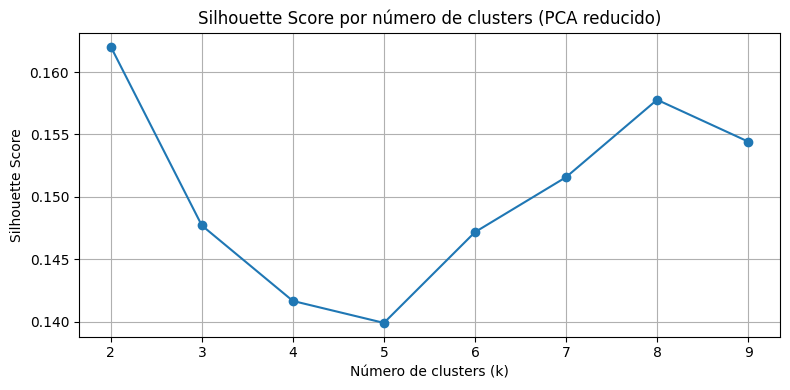

In [121]:
#@title Silhouette score para dataset reducido

# Evaluar silhouette score para varios k
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, labels))

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score por número de clusters (PCA reducido)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

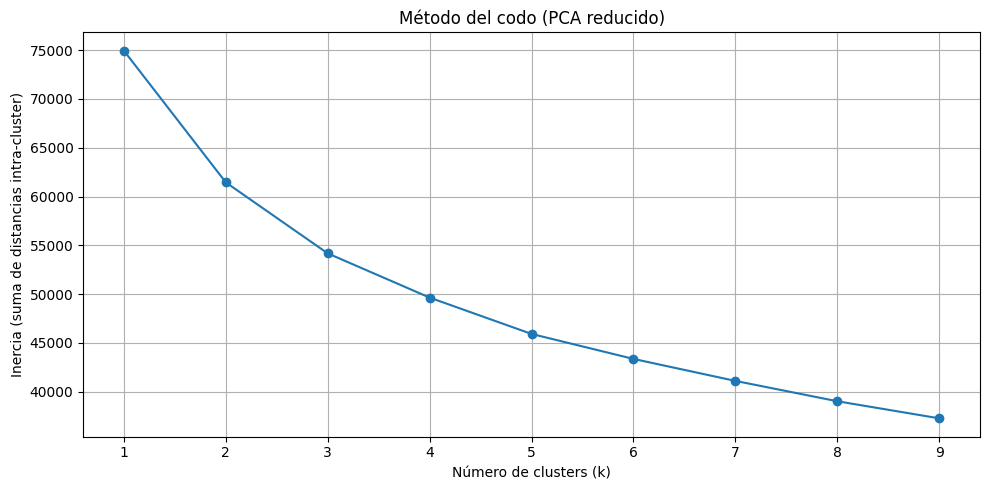

In [123]:
#@title Método del codo con dataset reducido

# Rango de posibles valores de k
inertia = []
k_values = range(1, 10)

# Calcular inercia para cada k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del codo (PCA reducido)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (suma de distancias intra-cluster)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [144]:
#@title Aplico Kmeans

kmeans_pca_3 = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters_pca_3 = kmeans_pca_3.fit_predict(X_pca)

df_pca_k3 = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])  # Solo los dos primeros componentes para graficar
df_pca_k3['Cluster_3'] = clusters_pca_3

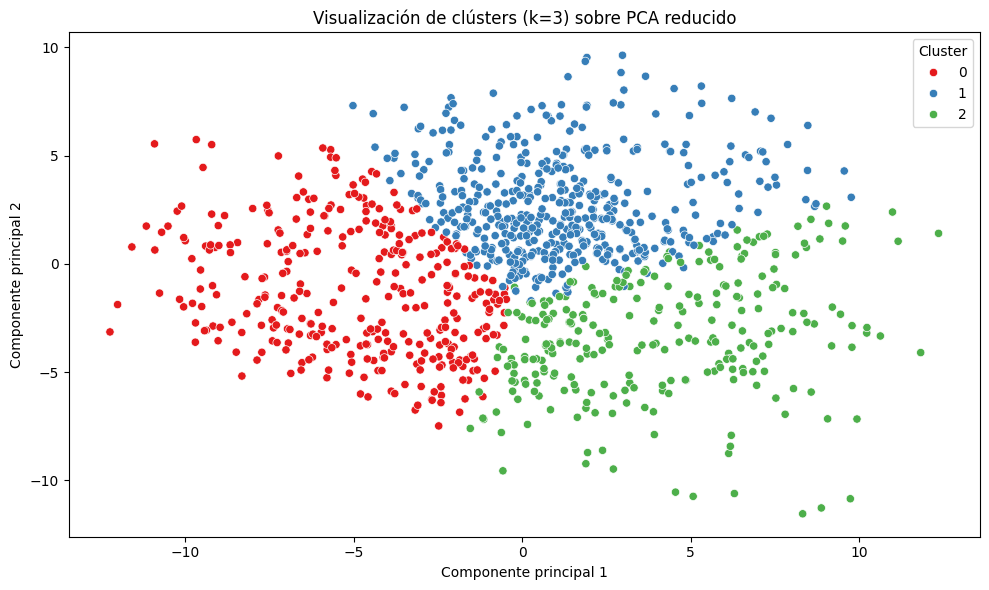

In [145]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_k3, x='PC1', y='PC2', hue='Cluster_3', palette='Set1')
plt.title('Visualización de claústers (k=3) sobre PCA reducido')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [149]:
# Crear nuevo DataFrame para comparación
df_kmeans_3 = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_kmeans_3['Cluster_3'] = clusters_pca_3
df_kmeans_3['class'] = df_kmeans_2['class']

# Tabla cruzada: comparación clústers vs clases reales
pd.crosstab(df_kmeans_3['Cluster_3'], df_kmeans_3['class'])

class,c-CS-m,c-CS-s,c-SC-m,c-SC-s,t-CS-m,t-CS-s,t-SC-m,t-SC-s
Cluster_3,,,,,,,,
0,44,52,30,31,81,50,4,45
1,34,22,120,91,13,13,126,60
2,72,61,0,13,41,42,5,30


#Creo el df con pca + clusters + etiquetas

In [155]:
# Crear DataFrame base con todos los componentes principales
df_pca_full = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Agregar los clústeres generados con KMeans sobre PCA
df_pca_full['Cluster_3'] = clusters_pca_3

# Agregar las etiquetas reales desde el DataFrame original
df_pca_full['class'] = df_completo_original['class']            # si tenés esta variable
df_pca_full['Genotype'] = df_completo_original['Genotype']      # si querés compararlo también
df_pca_full['Treatment'] = df_completo_original['Treatment']
df_pca_full['Behavior'] = df_completo_original['Behavior']


In [160]:
# Comparación del Cluster_3 con Genotype
print("🔍 Comparación Cluster_3 vs Genotype:")
pd.crosstab(df_pca_full['Cluster_3'], df_pca_full['Genotype'])

🔍 Comparación Cluster_3 vs Genotype:


Genotype,Control,Ts65Dn
Cluster_3,,
0,157,180
1,267,212
2,146,118


In [161]:
pd.crosstab(df_pca_full['Cluster_3'], df_pca_full['class'])

class,c-CS-m,c-CS-s,c-SC-m,c-SC-s,t-CS-m,t-CS-s,t-SC-m,t-SC-s
Cluster_3,,,,,,,,
0,44,52,30,31,81,50,4,45
1,34,22,120,91,13,13,126,60
2,72,61,0,13,41,42,5,30


## 6- Conclusiones

Escriba sus conclusiones comparando los resultados y experiencia entre aplicar clustering a todo el dataset vs al dataset reducido.

Discutir:

* ¿ Los clústeres se corresponden con clases reales ( si las hay)?
* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

Fundamente, justifique con sus palabras.

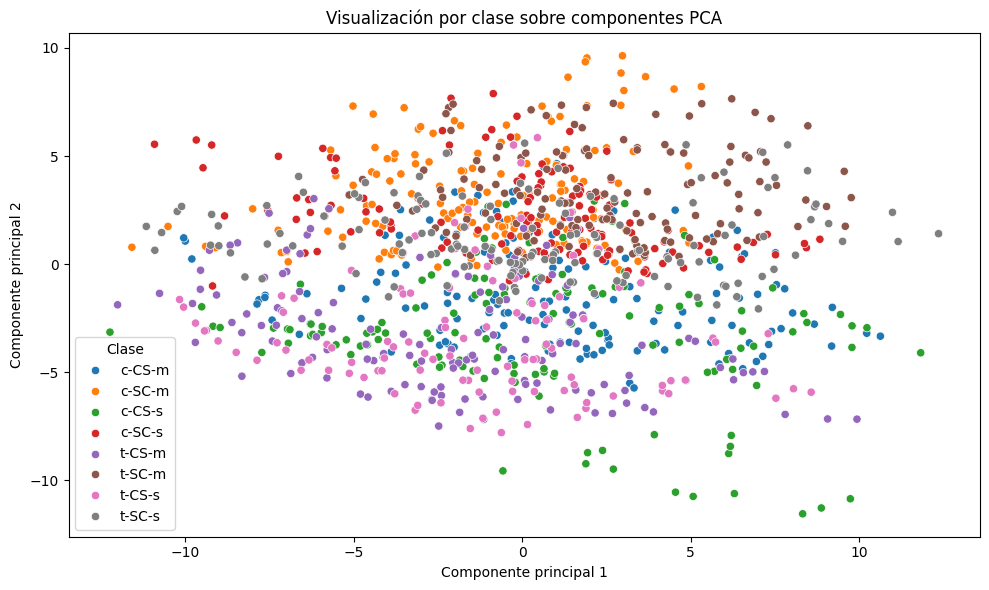

In [137]:
df_pca_k2['class'] = df_kmeans_2['class']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_k2, x='PC1', y='PC2', hue='class', palette='tab10')
plt.title('Visualización por clase sobre componentes PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Clase')
plt.tight_layout()
plt.show()


# 7- Bonus: elija una de las siguientes consignas para resolver.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

## 7.2 Análisis de outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¿ los outliers forman un clúster propio? ¿PCA / t-SNE preserva las anomalías?

# Referencias

Mencione los recursos utilizados